In [29]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1)
import plotly.express as px

pd.set_option('display.max_columns', None)
save_loc = 'C:\\Users\\calvi\\OneDrive\\Desktop\\database\\curry_prop'
os.chdir(save_loc)

# Reading Data

In [2]:
df = pd.read_csv('cleaned_game_logs9.csv', index_col=0)
df['Date'] = pd.to_datetime(df['Date'])
df

,Index,Player,Pos,Ht,Wt,Rk,G,Season,Date,Age,Age_whole,Tm,Home/Away,Opp,Unnamed: 7,GS,MP,MP_num,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,abrinal01,Álex Abrines,G-F,6-6,200.0,1,1.0,16-17,2016-10-26,23-086,23,OKC,Away,PHI,W (+6),0,13:24,13.400000,1,2,0.500,1,1,1.000,0,0,0.0,0,1,1,0,0,0,2,3,3,-0.9,3.0
1,abrinal01,Álex Abrines,G-F,6-6,200.0,3,2.0,16-17,2016-10-30,23-090,23,OKC,Home,LAL,W (+17),0,1:49,1.816667,1,1,1.000,0,0,0.000,3,3,1.0,0,0,0,0,1,0,0,0,5,5.7,0.0
2,abrinal01,Álex Abrines,G-F,6-6,200.0,4,3.0,16-17,2016-11-02,23-093,23,OKC,Away,LAC,W (+2),0,7:54,7.900000,2,2,1.000,2,2,1.000,0,0,0.0,0,0,0,0,0,0,2,0,6,3.4,4.0
3,abrinal01,Álex Abrines,G-F,6-6,200.0,5,4.0,16-17,2016-11-03,23-094,23,OKC,Away,GSW,L (-26),0,19:20,19.333333,1,6,0.167,1,6,0.167,2,2,1.0,1,2,3,1,0,0,0,0,5,3.2,-13.0
4,abrinal01,Álex Abrines,G-F,6-6,200.0,6,5.0,16-17,2016-11-05,23-096,23,OKC,Home,MIN,W (+20),0,17:16,17.266667,0,1,0.000,0,0,0.000,1,1,1.0,0,2,2,2,1,0,0,1,1,2.9,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349845,knoxke01,Kevin Knox,F,6-7,215.0,75,26.0,21-22,2022-03-23,22-224,22,ATL,Away,DET,L (-21),0,6:07,6.116667,0,1,0.000,0,1,0.000,2,2,1.0,0,1,1,0,0,0,0,1,2,1.2,2.0
349846,knoxke01,Kevin Knox,F,6-7,215.0,78,27.0,21-22,2022-03-30,22-231,22,ATL,Away,OKC,W (+18),0,17:58,17.966667,6,10,0.600,3,6,0.500,2,2,1.0,0,2,2,0,1,1,0,4,17,13.1,2.0
349847,knoxke01,Kevin Knox,F,6-7,215.0,79,28.0,21-22,2022-03-31,22-232,22,ATL,Home,CLE,W (+24),0,7:23,7.383333,3,4,0.750,1,2,0.500,0,0,0.0,0,1,1,0,0,0,0,1,7,5.3,-9.0
349848,knoxke01,Kevin Knox,F,6-7,215.0,82,29.0,21-22,2022-04-06,22-238,22,ATL,Home,WAS,W (+15),0,1:30,1.500000,0,1,0.000,0,1,0.000,0,0,0.0,0,0,0,0,0,0,0,0,0,-0.7,-4.0


In [10]:
# Separating 2-point attempts from 3's
df.insert(20, '2P', df['FG'] - df['3P'])
df.insert(21, '2PA', df['FGA'] - df['3PA'])
df.insert(22, '2P%', df['2P']/df['2PA'])
df.insert(23, '2P_pts', 2*df['2P'])
df.insert(27, '3P_pts', 3*df['3P'])

In [11]:
numeric_cols = ['PTS', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P_pts', '2P%', '3P', '3PA', '3P_pts', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV']

In [12]:
# Grabbing Steph's game logs
df_curry = df.loc[(df['Player'] == 'Stephen Curry')].reset_index(drop=True)

# 1. Exploring Target Variable: Points

In [16]:
df_curry

,Index,Player,Pos,Ht,Wt,Rk,G,Season,Date,Age,Age_whole,Tm,Home/Away,Opp,Unnamed: 7,GS,MP,MP_num,FG,FGA,2P,2PA,2P%,2P_pts,FG%,3P,3PA,3P_pts,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,curryst01,Stephen Curry,G,6-2,185.0,1,1.0,09-10,2009-10-28,21-228,21,GSW,Home,HOU,L (-1),1,35:39,35.650000,7,12,7,11,0.636364,14,0.583,0,1,0,0.000,0,0,0.000,1,1,2,7,4,0,2,2,14,15.5,7.0
1,curryst01,Stephen Curry,G,6-2,185.0,2,2.0,09-10,2009-10-30,21-230,21,GSW,Away,PHO,L (-22),1,39:05,39.083333,5,9,3,6,0.500000,6,0.556,2,3,6,0.667,0,0,0.000,0,2,2,4,1,0,3,5,12,7.1,-19.0
2,curryst01,Stephen Curry,G,6-2,185.0,3,3.0,09-10,2009-11-04,21-235,21,GSW,Home,MEM,W (+8),1,28:27,28.450000,3,6,2,4,0.500000,4,0.500,1,2,3,0.500,0,0,0.000,0,5,5,9,2,0,1,4,7,11.2,-4.0
3,curryst01,Stephen Curry,G,6-2,185.0,4,4.0,09-10,2009-11-06,21-237,21,GSW,Home,LAC,L (-28),1,21:32,21.533333,1,5,1,4,0.250000,2,0.200,0,1,0,0.000,3,4,0.750,0,1,1,3,0,0,0,6,5,1.5,-13.0
4,curryst01,Stephen Curry,G,6-2,185.0,5,5.0,09-10,2009-11-08,21-239,21,GSW,Away,SAC,L (-13),1,31:15,31.250000,4,8,3,6,0.500000,6,0.500,1,2,3,0.500,0,2,0.000,1,3,4,6,0,0,5,4,9,3.4,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,curryst01,Stephen Curry,G,6-2,185.0,78,52.0,22-23,2023-03-31,35-017,35,GSW,Home,SAS,W (+15),1,32:43,32.716667,11,21,4,10,0.400000,8,0.524,7,11,21,0.636,4,4,1.000,1,1,2,5,0,0,1,1,33,25.8,-3.0
878,curryst01,Stephen Curry,G,6-2,185.0,79,53.0,22-23,2023-04-02,35-019,35,GSW,Away,DEN,L (-2),1,36:53,36.883333,8,28,6,14,0.428571,12,0.286,2,14,6,0.143,3,3,1.000,1,2,3,4,0,2,3,1,21,6.7,-5.0
879,curryst01,Stephen Curry,G,6-2,185.0,80,54.0,22-23,2023-04-04,35-021,35,GSW,Home,OKC,W (+11),1,36:46,36.766667,11,25,5,12,0.416667,10,0.440,6,13,18,0.462,6,6,1.000,0,5,5,6,1,0,0,3,34,26.4,14.0
880,curryst01,Stephen Curry,G,6-2,185.0,81,55.0,22-23,2023-04-07,35-024,35,GSW,Away,SAC,W (+22),1,32:41,32.683333,8,14,5,7,0.714286,10,0.571,3,7,9,0.429,6,7,0.857,1,6,7,6,2,1,5,1,25,22.0,33.0


In [17]:
df_curry['Season'].value_counts().sort_index()

Season
09-10    80
10-11    74
11-12    26
12-13    78
13-14    78
14-15    80
15-16    79
16-17    79
17-18    51
18-19    69
19-20     5
20-21    63
21-22    64
22-23    56
Name: count, dtype: int64

In [18]:
px.line(df_curry, x=df_curry.index, y='PTS')

In [21]:
# Zooming into the plot above to see if having rolling averages would be useful features
px.line(df_curry, x=df_curry.index, y='PTS')

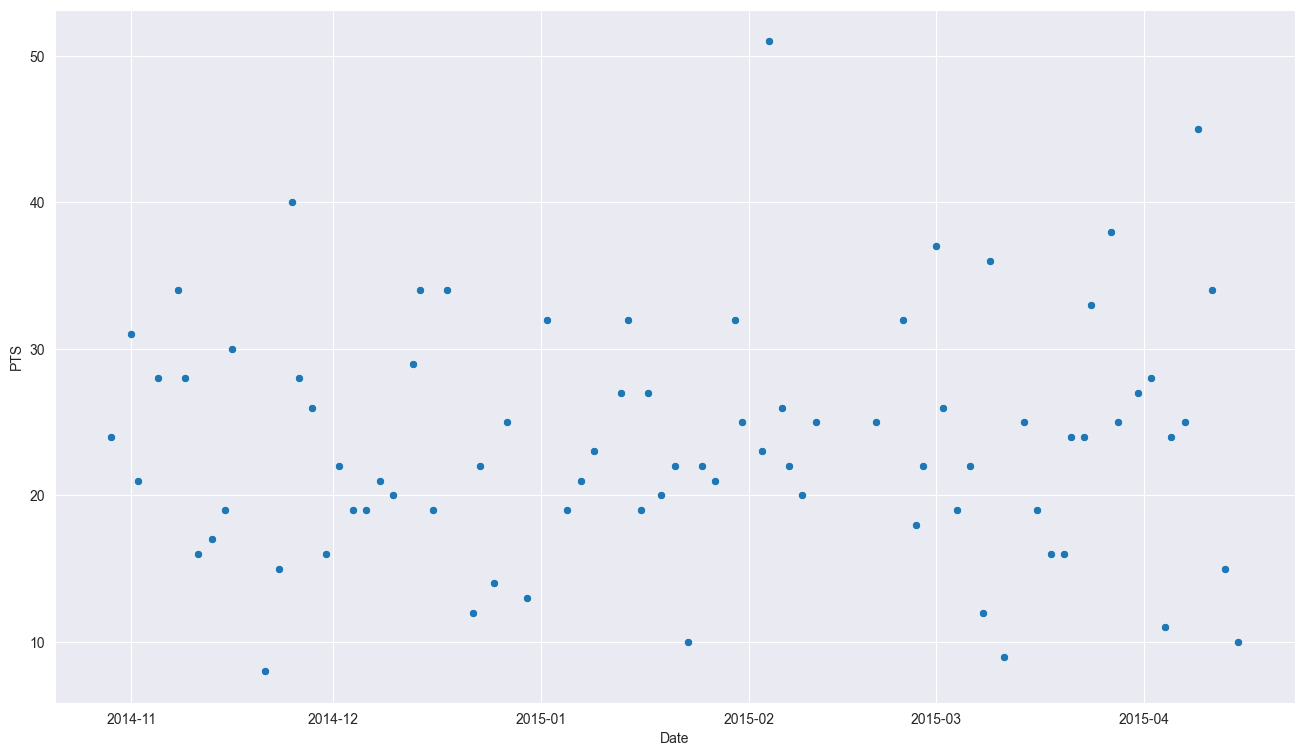

In [22]:
plt.figure(figsize=(16,9))
sns.set_style('darkgrid')
sns.scatterplot(data=df_curry.loc[df_curry['Season'] == '14-15'], y='PTS', x ='Date')
plt.show()

The distribution of the target variable of points looks pretty close to a normal distribution. This will be useful to know how to model the variable later.

c:\Users\calvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



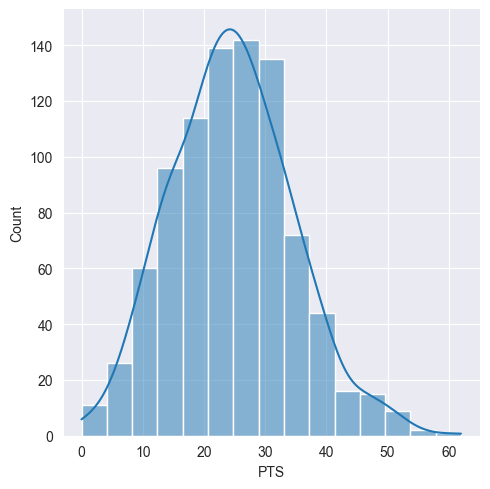

In [23]:
sns.displot(df_curry['PTS'], kde=True, bins=15)
plt.show()

Steph has scored 20+ PPG in every year of his career except his first 3 years. Monte Ellis was traded after the 11-12 season and Steph became the focal point of the offense, so it makes sense he started scoring more after that year. I might take this into account when modeling by discarding these years. His stats after these seasons might be more reflective of the role and the player we know Steph is.

In [25]:
df_curry.groupby('Season')['PTS'].mean()

Season
09-10    17.487500
10-11    18.554054
11-12    14.730769
12-13    22.897436
13-14    24.012821
14-15    23.750000
15-16    30.063291
16-17    25.303797
17-18    26.392157
18-19    27.260870
19-20    20.800000
20-21    31.984127
21-22    25.468750
22-23    29.428571
Name: PTS, dtype: float64

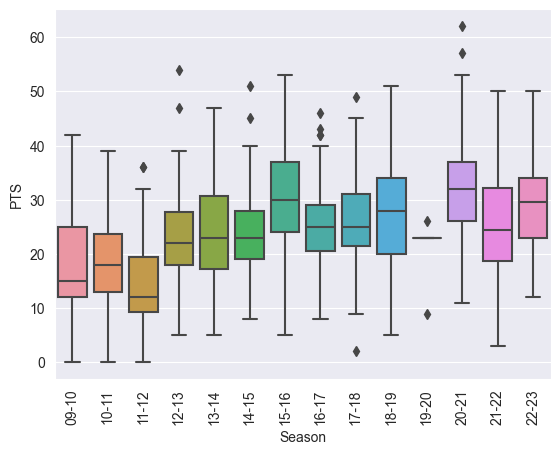

In [24]:
sns.boxplot(x=df_curry['Season'], y=df_curry['PTS'])
plt.xticks(rotation=90)
plt.show()

It looks like playing home vs away doesn't affect Steph's scoring too much, which is a little surprising. It would be interesting to see the difference for playoff games, but we're only building a model based on regular season games right now.

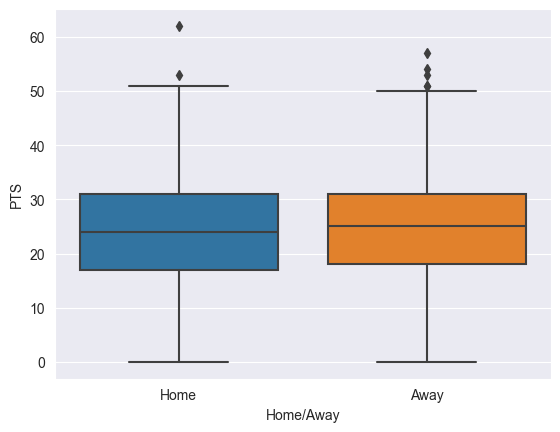

In [26]:
sns.boxplot(x=df_curry['Home/Away'], y=df_curry['PTS'])
plt.show()

# 2. Exploring Curry's Box Score Stats

## 2.1 Box Score Stats Distributions

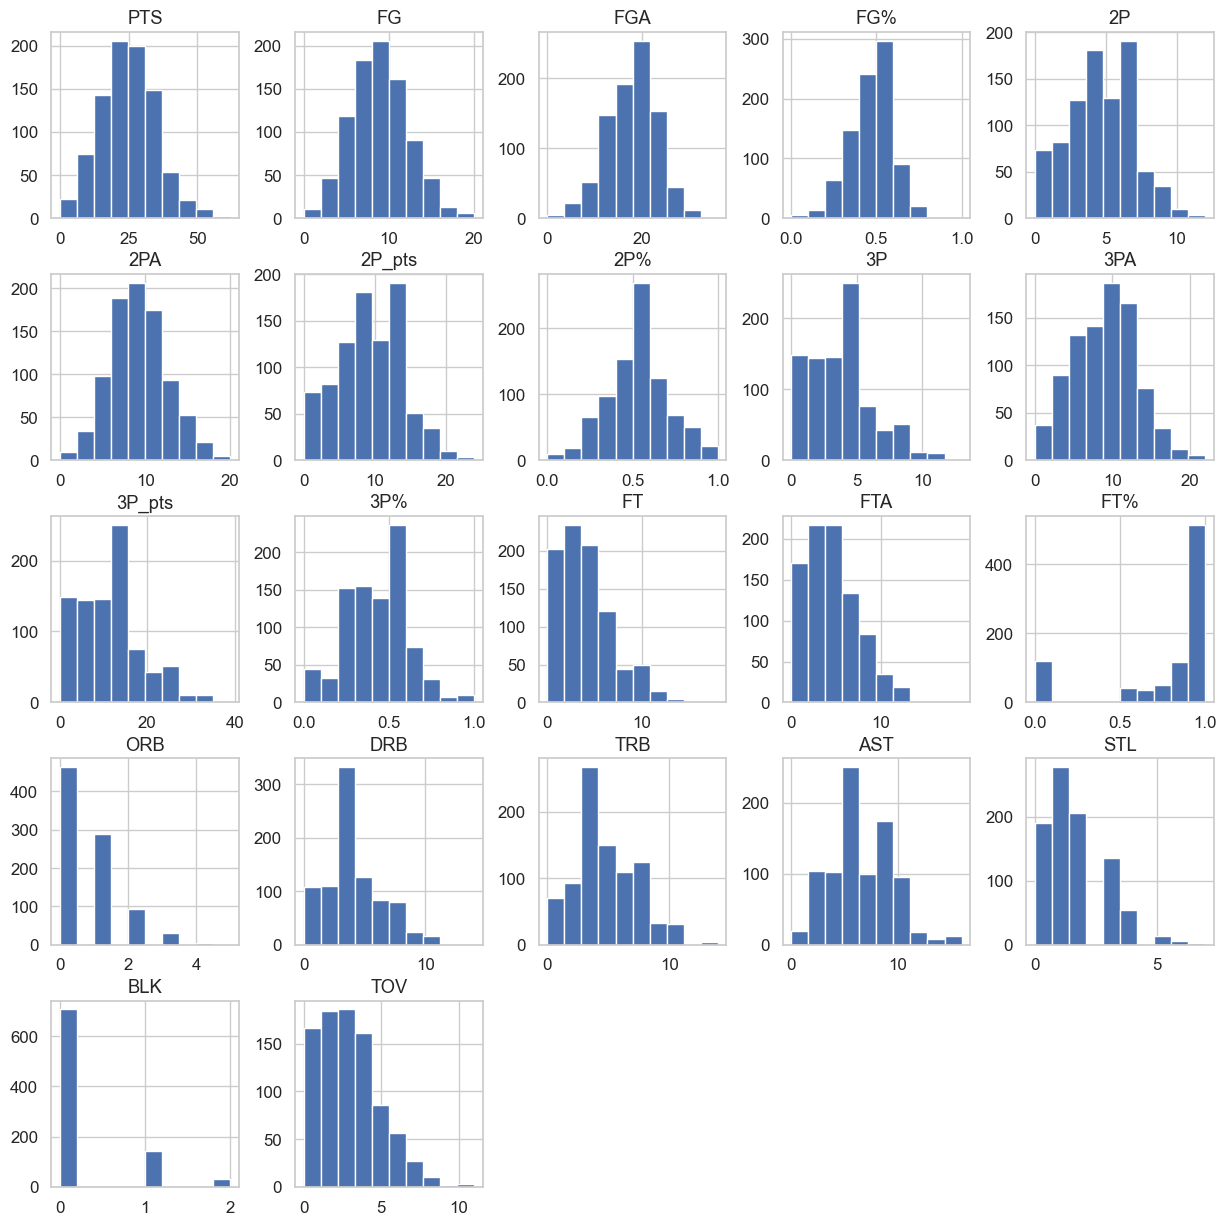

In [28]:
df_curry[numeric_cols].hist(figsize=(15,15))
plt.show()

## 2.2 Box Score Stats Relationship with Points

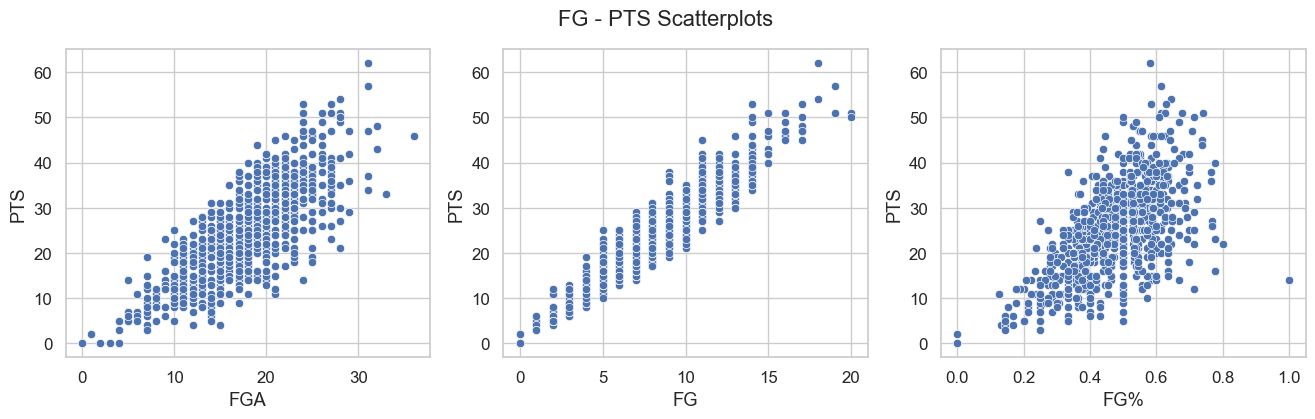

In [33]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(16,4))
sns.scatterplot(x=df_curry['FGA'], y=df_curry['PTS'], ax=ax1)
sns.scatterplot(x=df_curry['FG'], y=df_curry['PTS'], ax=ax2)
sns.scatterplot(x=df_curry['FG%'], y=df_curry['PTS'], ax=ax3)

#fig.tight_layout()
fig.suptitle('FG - PTS Scatterplots')
plt.show()

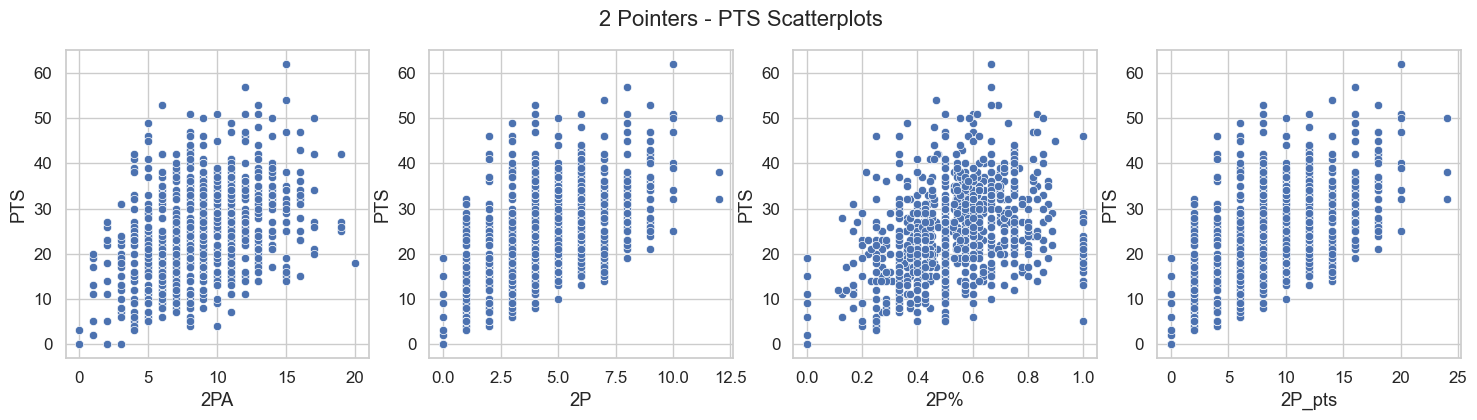

In [34]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1,4, figsize=(18,4))
sns.scatterplot(x=df_curry['2PA'], y=df_curry['PTS'], ax=ax1)
sns.scatterplot(x=df_curry['2P'], y=df_curry['PTS'], ax=ax2)
sns.scatterplot(x=df_curry['2P%'], y=df_curry['PTS'], ax=ax3)
sns.scatterplot(x=df_curry['2P_pts'], y=df_curry['PTS'], ax=ax4)

#fig.tight_layout()
fig.suptitle('2 Pointers - PTS Scatterplots')
plt.show()

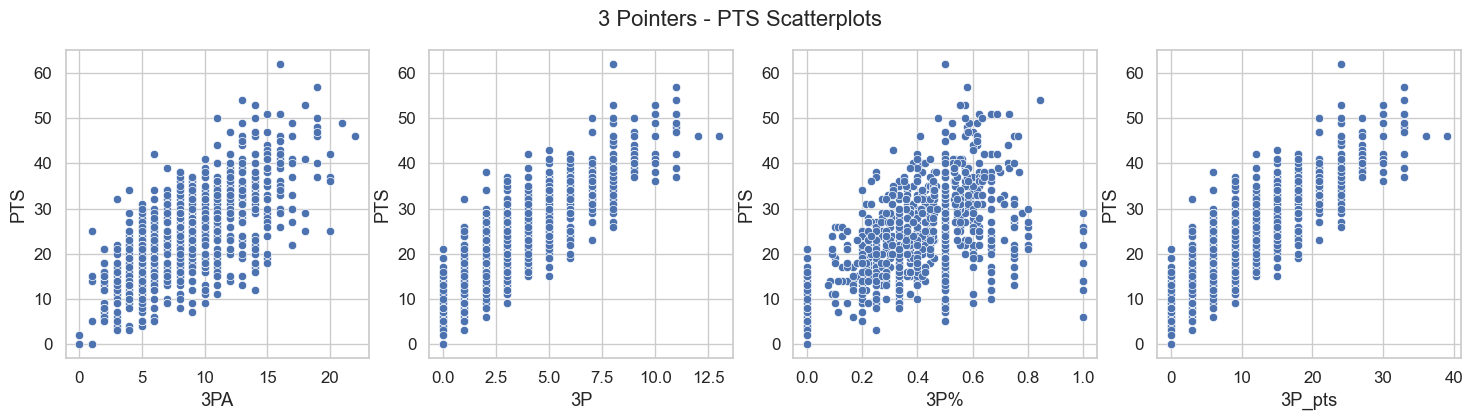

In [35]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1,4, figsize=(18,4))
sns.scatterplot(x=df_curry['3PA'], y=df_curry['PTS'], ax=ax1)
sns.scatterplot(x=df_curry['3P'], y=df_curry['PTS'], ax=ax2)
sns.scatterplot(x=df_curry['3P%'], y=df_curry['PTS'], ax=ax3)
sns.scatterplot(x=df_curry['3P_pts'], y=df_curry['PTS'], ax=ax4)

#fig.tight_layout()
fig.suptitle('3 Pointers - PTS Scatterplots')
plt.show()

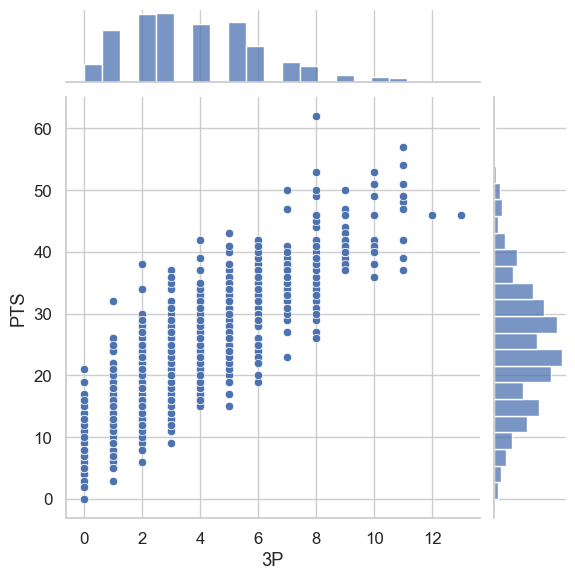

In [39]:
sns.jointplot(x=df_curry['3P'], y=df_curry['PTS'])
plt.show()

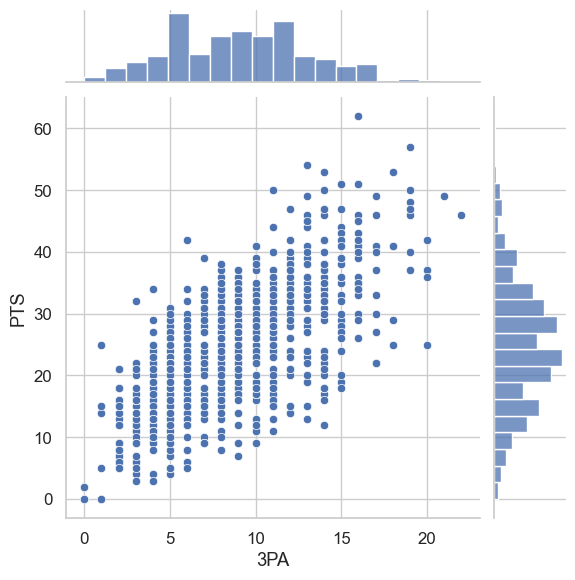

In [40]:
sns.jointplot(x=df_curry['3PA'], y=df_curry['PTS'])
plt.show()

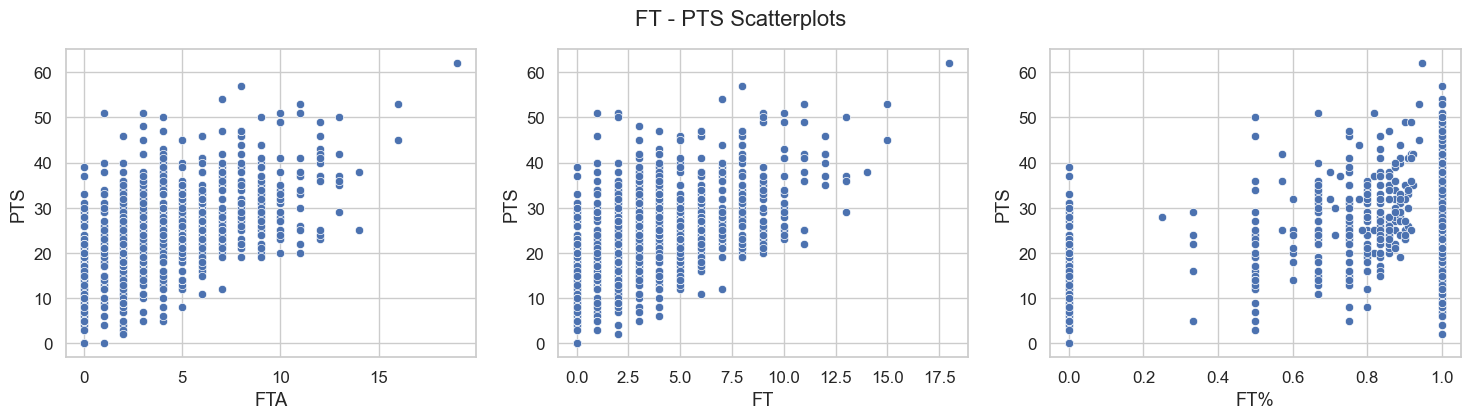

In [36]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,4))
sns.scatterplot(x=df_curry['FTA'], y=df_curry['PTS'], ax=ax1)
sns.scatterplot(x=df_curry['FT'], y=df_curry['PTS'], ax=ax2)
sns.scatterplot(x=df_curry['FT%'], y=df_curry['PTS'], ax=ax3)

#fig.tight_layout()
fig.suptitle('FT - PTS Scatterplots')
plt.show()

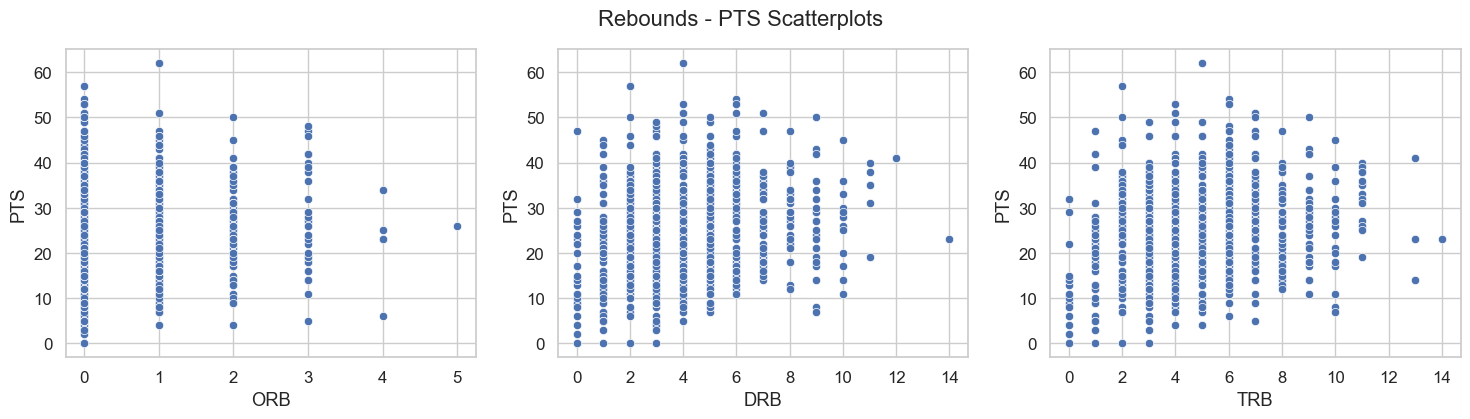

In [41]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,4))
sns.scatterplot(x=df_curry['ORB'], y=df_curry['PTS'], ax=ax1)
sns.scatterplot(x=df_curry['DRB'], y=df_curry['PTS'], ax=ax2)
sns.scatterplot(x=df_curry['TRB'], y=df_curry['PTS'], ax=ax3)

#fig.tight_layout()
fig.suptitle('Rebounds - PTS Scatterplots')
plt.show()

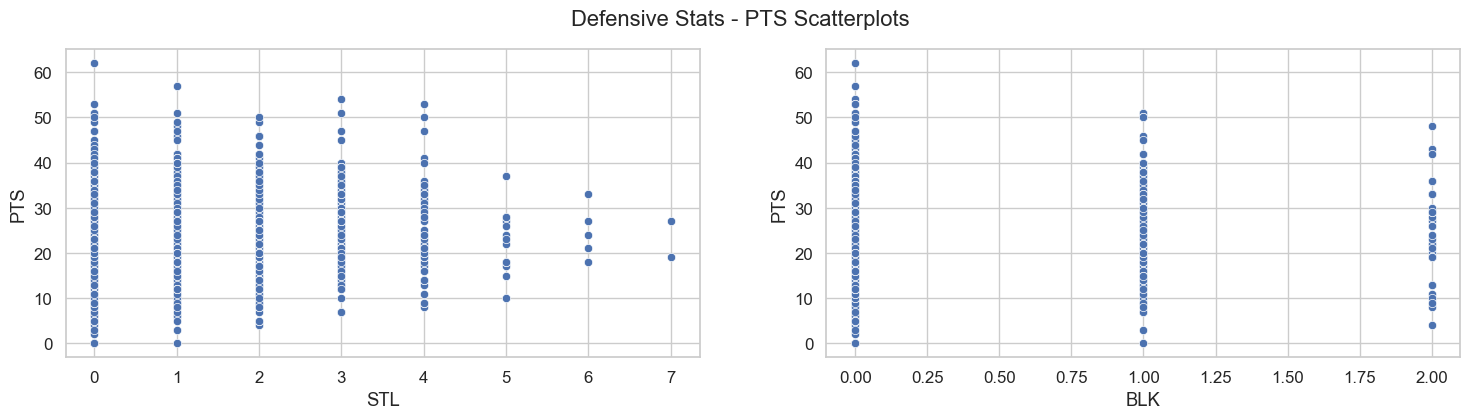

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,4))
sns.scatterplot(x=df_curry['STL'], y=df_curry['PTS'], ax=ax1)
sns.scatterplot(x=df_curry['BLK'], y=df_curry['PTS'], ax=ax2)

#fig.tight_layout()
fig.suptitle('Defensive Stats - PTS Scatterplots')
plt.show()

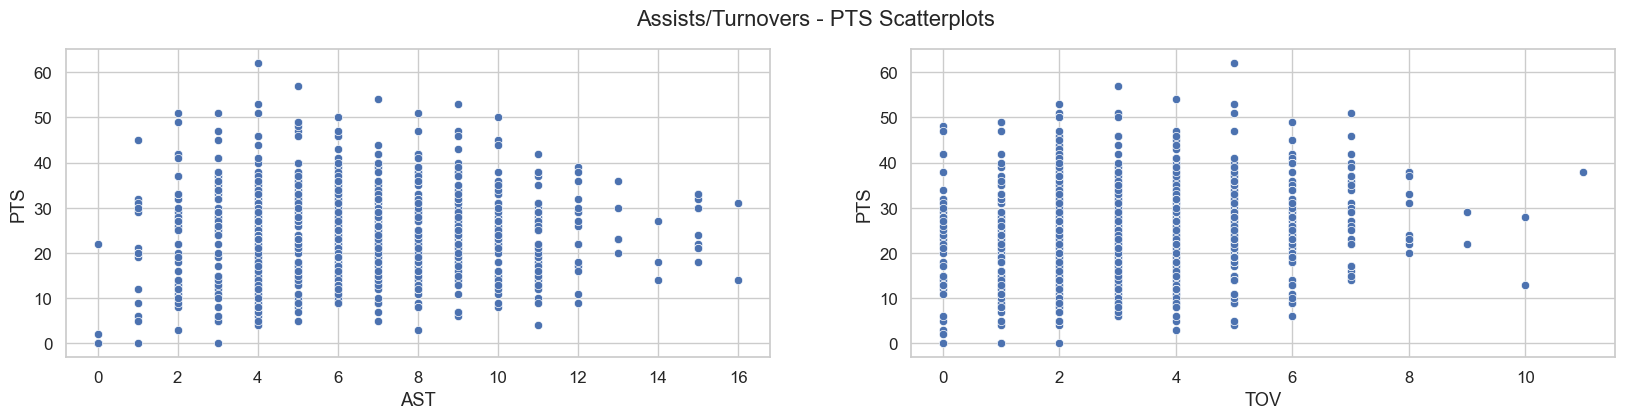

In [43]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,4))
sns.scatterplot(x=df_curry['AST'], y=df_curry['PTS'], ax=ax1)
sns.scatterplot(x=df_curry['TOV'], y=df_curry['PTS'], ax=ax2)

#fig.tight_layout()
fig.suptitle('Assists/Turnovers - PTS Scatterplots')
plt.show()